<a href="https://colab.research.google.com/github/arijitd60/arijitd60/blob/main/Credit_Risk_Individual%20Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
  from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Importing Libraries

In [22]:
import time
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
%matplotlib inline

pd.set_option('max_columns', 22)
pd.set_option('max_rows', 22)

In [23]:
# Setting environment to ignore future warnings
import warnings
warnings.simplefilter('ignore')

In [24]:
# Default figure size for EDA
from matplotlib.pylab import rcParams
rcParams["figure.figsize"] = (14, 7)

# Loading Dataset

In [25]:
path = r"2ndAssgnOption1 data set.xlsx"
df = pd.read_excel(path)
df.head()

,foreignworker,status- minimum balance pm,credithistory,purpose-credit sought [dominant last 6m],savings,employmentsince,otherdebtors,property,otherinstallments,housing,job,phone,duration,creditamount,installmentrate,residencesince,age,numberofexsistingcredits,numberofliablepeople,gender,creditworthy,creditamout_per_month
0,yes,< 0 Euro,critical account/,radio/television,unknown/ no savings account,.. >= 7 years,none,real estate,none,own,skilled employee / official,"yes, registered under the customers name",6,1169,4,4,67,2,1,male,Worthy,194.833333
1,yes,< 200 Euro,existing credits paid back duly till now,radio/television,... < 100 Euro,1 <= ... < 4 years,none,real estate,none,own,skilled employee / official,none,48,5951,2,2,22,1,1,female,Not Worthy,123.979167
2,yes,no checking account,critical account/,education,... < 100 Euro,4 <= ... < 7 years,none,real estate,none,own,unskilled - resident,none,12,2096,2,3,49,1,2,male,Worthy,174.666667
3,yes,< 0 Euro,existing credits paid back duly till now,furniture/equipment,... < 100 Euro,4 <= ... < 7 years,guarantor,building society savings agreement/ life insur...,none,for free,skilled employee / official,none,42,7882,2,4,45,1,2,male,Worthy,187.666667
4,yes,< 0 Euro,delay in paying off in the past,car (new),... < 100 Euro,1 <= ... < 4 years,none,unknown / no property,none,for free,skilled employee / official,none,24,4870,3,4,53,2,2,male,Not Worthy,202.916667


# Descriptive Analysis

In [26]:
# Checking shape of dataset
df.shape

(988, 22)

In [27]:
# Printing the name of columns
print(df.columns)

Index(['foreignworker', 'status- minimum balance pm', 'credithistory',
       'purpose-credit sought [dominant last 6m]', 'savings',
       'employmentsince', 'otherdebtors', 'property', 'otherinstallments',
       'housing', 'job', 'phone', 'duration', 'creditamount',
       'installmentrate', 'residencesince', 'age', 'numberofexsistingcredits',
       'numberofliablepeople', 'gender', 'creditworthy',
       'creditamout_per_month'],
      dtype='object')


In [28]:
# Getting Numerical and Categorical columns Separately
cat_cols = df.select_dtypes(np.object).columns
num_cols = df.select_dtypes(np.number).columns

# Printing the Numerical columns
print("Dataset has following Numerical columns...")
for i, j in enumerate(num_cols):
    print(f" {i+1}) {j}")

# Printing the Categorical columns
print("\n\nDataset has following Categorical columns...")
for i, j in enumerate(cat_cols):
    print(f" {i+1}) {j}")

Dataset has following Numerical columns...
 1) duration
 2) creditamount
 3) installmentrate
 4) residencesince
 5) age
 6) numberofexsistingcredits
 7) numberofliablepeople
 8) creditamout_per_month


Dataset has following Categorical columns...
 1) foreignworker
 2) status- minimum balance pm
 3) credithistory
 4) purpose-credit sought [dominant last 6m]
 5) savings
 6) employmentsince
 7) otherdebtors
 8) property
 9) otherinstallments
 10) housing
 11) job
 12) phone
 13) gender
 14) creditworthy


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 988 entries, 0 to 987
Data columns (total 22 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   foreignworker                             988 non-null    object 
 1   status- minimum balance pm                988 non-null    object 
 2   credithistory                             988 non-null    object 
 3   purpose-credit sought [dominant last 6m]  988 non-null    object 
 4   savings                                   988 non-null    object 
 5   employmentsince                           988 non-null    object 
 6   otherdebtors                              988 non-null    object 
 7   property                                  988 non-null    object 
 8   otherinstallments                         988 non-null    object 
 9   housing                                   988 non-null    object 
 10  job                                   

In [30]:
# Statictics Properties of Numerical Columns
df[num_cols].describe()

,duration,creditamount,installmentrate,residencesince,age,numberofexsistingcredits,numberofliablepeople,creditamout_per_month
count,988.000000,988.000000,988.000000,988.000000,988.000000,988.000000,988.000000,988.000000
mean,20.895749,3277.276316,2.975709,2.842105,35.461538,1.407895,1.154858,167.745007
std,12.075005,2830.518737,1.117883,1.101426,11.301502,0.578769,0.361953,153.238257
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000,24.055556
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000,89.729167
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000,130.807143
75%,24.000000,3973.750000,4.000000,4.000000,42.000000,2.000000,1.000000,206.258333
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000,2482.666667


In [31]:
# Statictics Properties of Categorical Columns
df[cat_cols].describe()

,foreignworker,status- minimum balance pm,credithistory,purpose-credit sought [dominant last 6m],savings,employmentsince,otherdebtors,property,otherinstallments,housing,job,phone,gender,creditworthy
count,988,988,988,988,988,988,988,988,988,988,988,988,988,988
unique,3,4,5,10,5,5,3,4,3,3,4,2,2,2
top,yes,no checking account,existing credits paid back duly till now,radio/television,... < 100 Euro,1 <= ... < 4 years,none,car or other,none,own,skilled employee / official,none,male,Worthy
freq,941,390,525,278,596,338,895,330,803,707,623,587,683,691


# Exploratory Data Analysis

### a) Uni-Variate Analysis

In [32]:
# Function to show percentage on bars
def per_on_bar(plot,feature):
    total = len(feature)
    for p in plot.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2 - 0.08
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x, y), size = 12)
    plt.show()

In [33]:
def make_plots(feature, title="", limited=False, n=10):
    print("Total unique values are: ", len(feature.value_counts()), "\n\n")
    print("Category\tValue\n")
    if limited:
        data = feature.value_counts()[0:n]
    else:
        data = feature.value_counts()
    print(data)
    categories_num = len(data)
    #plotting bar-plot and pie chart
    sns.set_style('darkgrid')
    plt.figure(figsize=(16,5))
    plt.subplot(1,2,1)
    plt.title(title)
    plt.xticks(rotation=45)
    sns.barplot(x=data.index, y=data.values, edgecolor="black", palette=sns.palettes.color_palette("icefire"))
    
    plt.subplot(1,2,2)
    labels = data.index
    plt.pie(x=data, autopct="%.1f%%", explode=[0.02]*categories_num, labels=labels, pctdistance=0.5)
    plt.title(title)
    plt.show()



 !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

Total unique values are:  3 


Category	Value

yes        941
no          36
Unknown     11
Name: foreignworker, dtype: int64


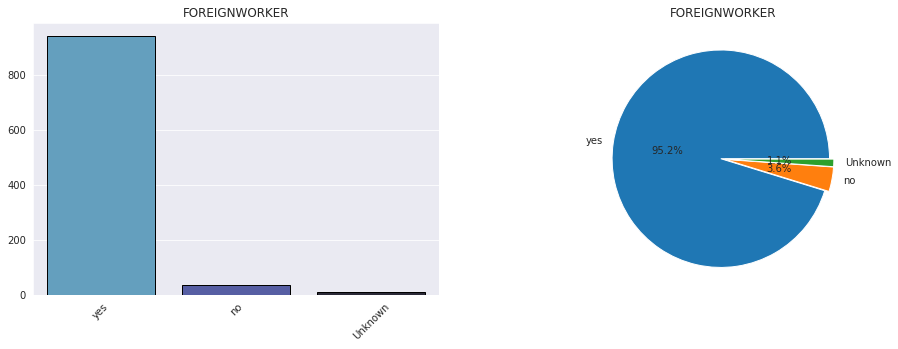



 !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

Total unique values are:  4 


Category	Value

no checking account    390
< 0 Euro               272
< 200 Euro             265
>= 200 Euro             61
Name: status- minimum balance pm, dtype: int64


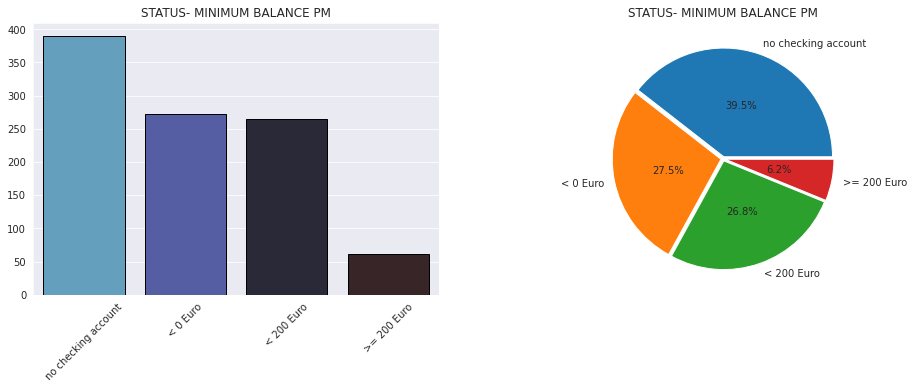



 !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

Total unique values are:  5 


Category	Value

existing credits paid back duly till now    525
critical account/                           288
delay in paying off in the past              86
all credits at this bank paid back duly      49
No credits taken                             40
Name: credithistory, dtype: int64


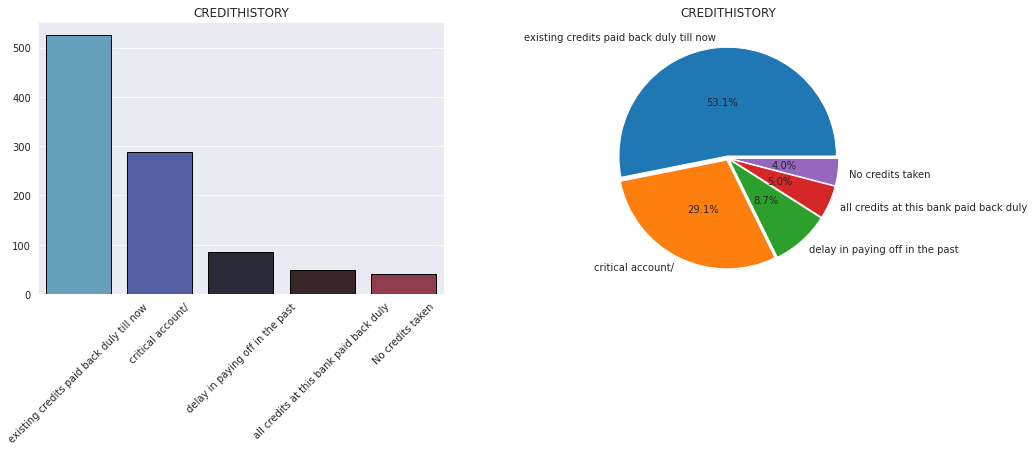



 !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

Total unique values are:  10 


Category	Value

radio/television       278
car (new)              230
furniture/equipment    180
car (used)             101
business                94
education               50
repairs                 22
others                  12
domestic appliances     12
retraining               9
Name: purpose-credit sought [dominant last 6m], dtype: int64


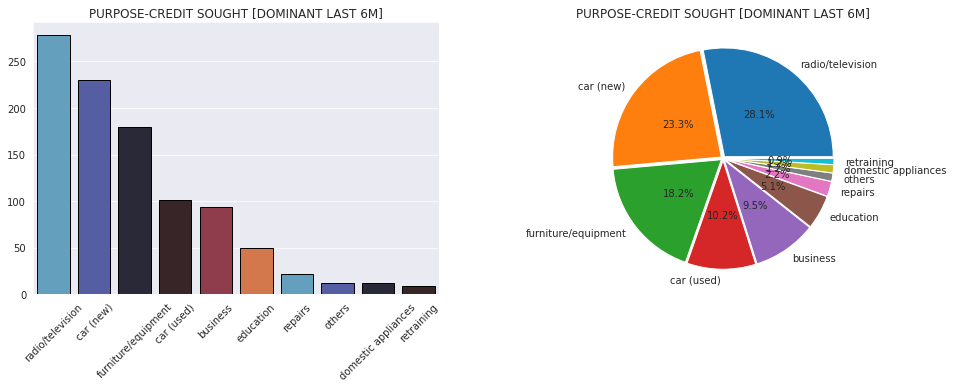



 !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

Total unique values are:  5 


Category	Value

... < 100 Euro                 596
unknown/ no savings account    182
100 <= ... < 500 Euro          101
500 <= ... < 1000 Euro          62
.. >= 1000 Euro                 47
Name: savings, dtype: int64


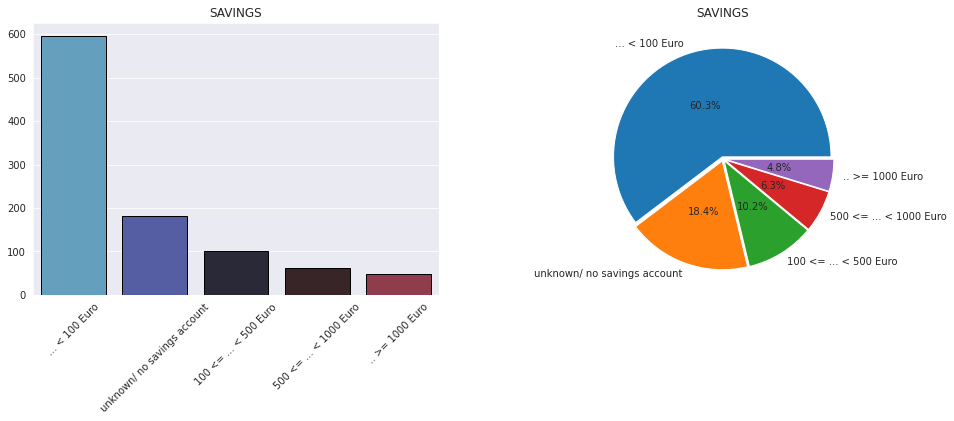



 !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

Total unique values are:  5 


Category	Value

1 <= ... < 4 years    338
.. >= 7 years         247
... < 1 year          171
4 <= ... < 7 years    170
unemployed             62
Name: employmentsince, dtype: int64


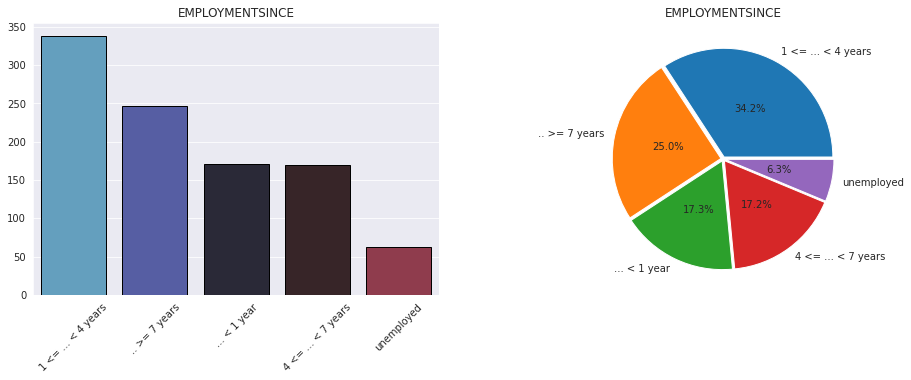



 !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!



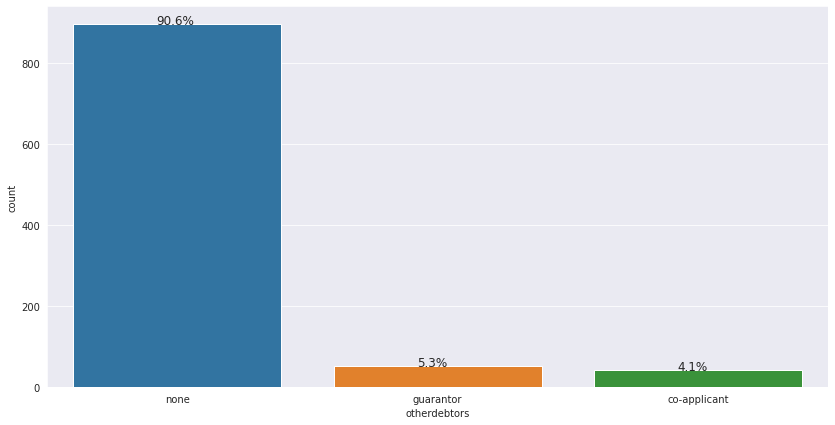



 !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

Total unique values are:  4 


Category	Value

car or other                                          330
real estate                                           279
building society savings agreement/ life insurance    229
unknown / no property                                 150
Name: property, dtype: int64


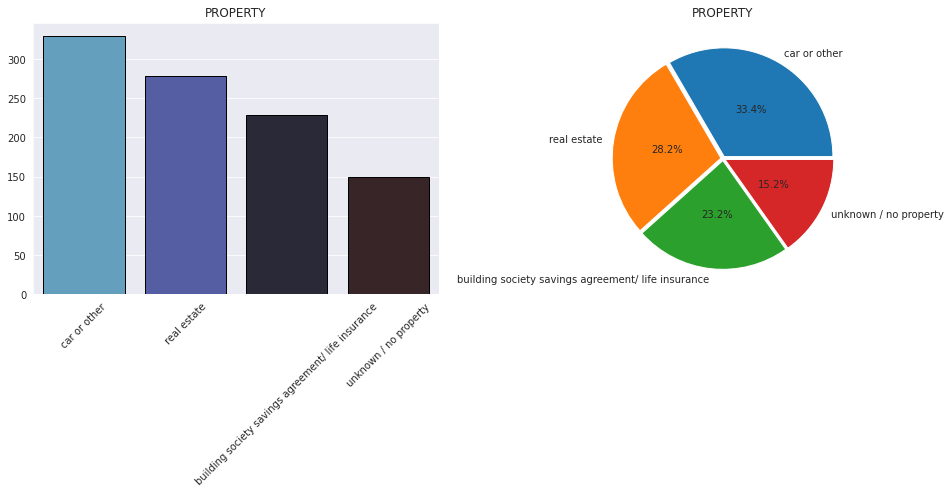



 !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

Total unique values are:  3 


Category	Value

none      803
bank      138
stores     47
Name: otherinstallments, dtype: int64


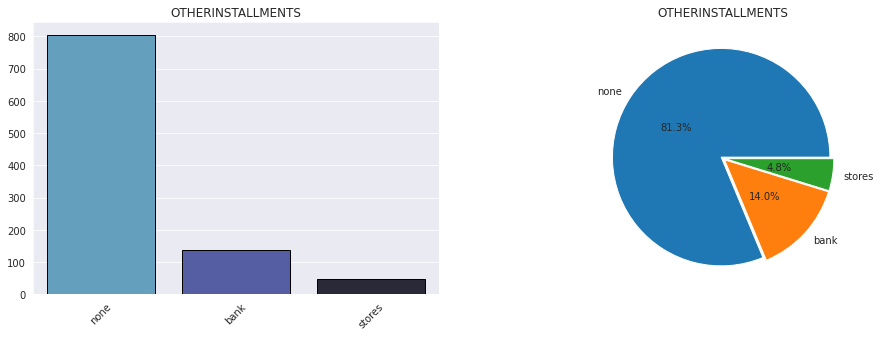



 !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

Total unique values are:  3 


Category	Value

own         707
rent        176
for free    105
Name: housing, dtype: int64


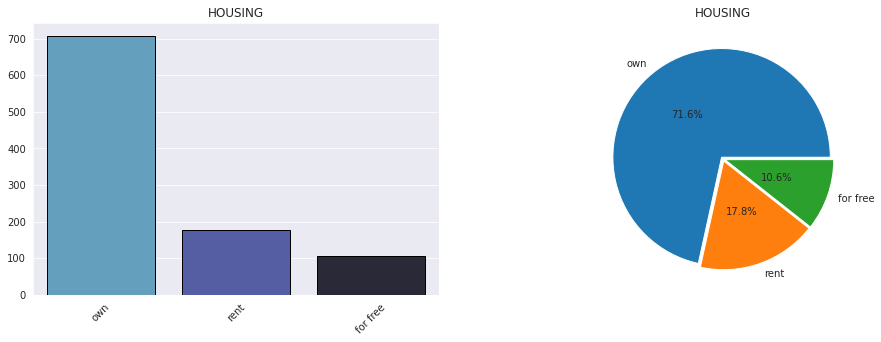



 !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

Total unique values are:  4 


Category	Value

skilled employee / official                           623
unskilled - resident                                  197
management/ self-employed/ highly qualified employ    146
unemployed/ unskilled - non-resident                   22
Name: job, dtype: int64


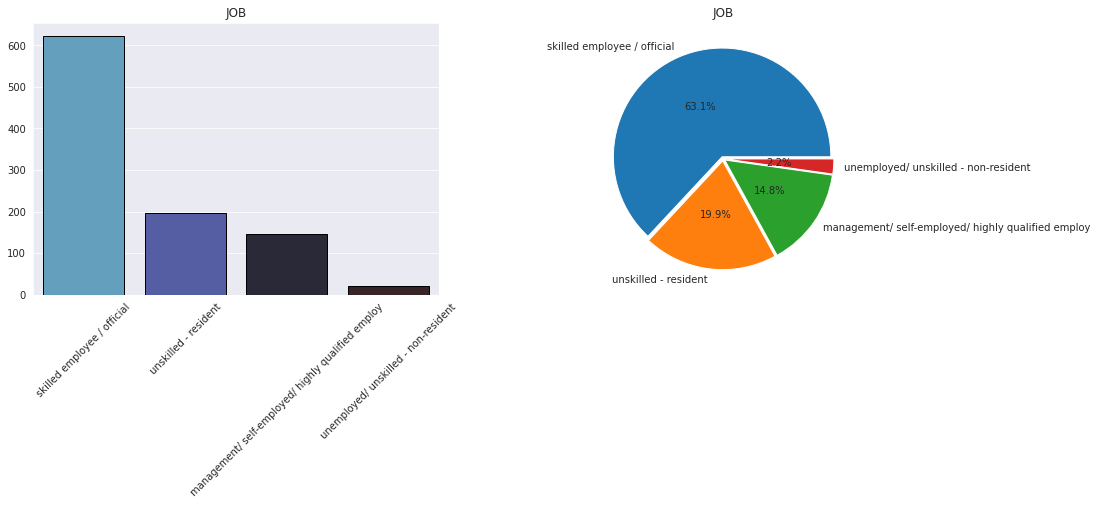



 !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

Total unique values are:  2 


Category	Value

none                                        587
yes, registered under the customers name    401
Name: phone, dtype: int64


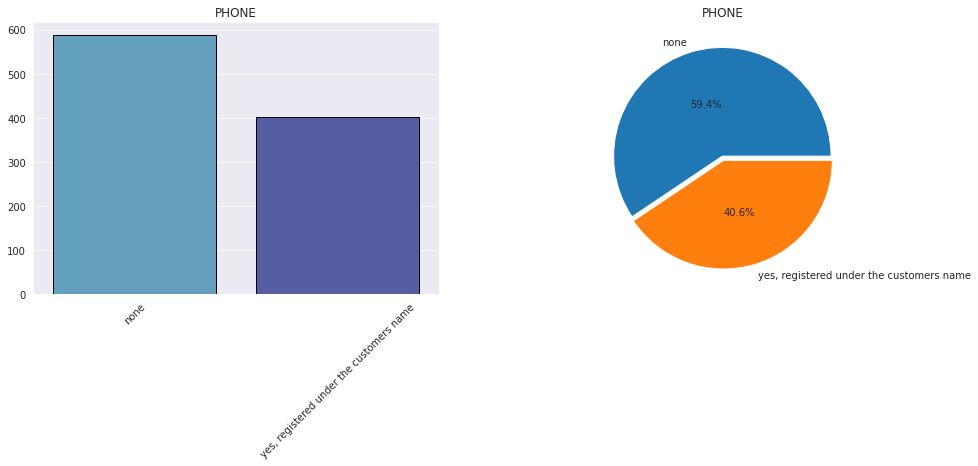



 !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!



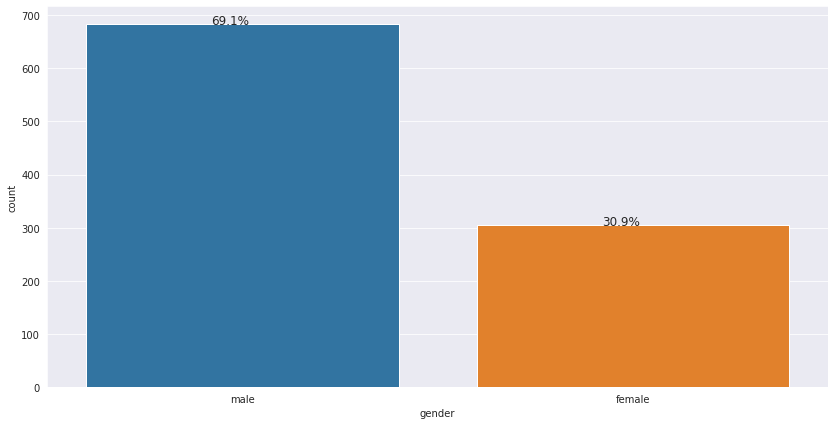



 !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!



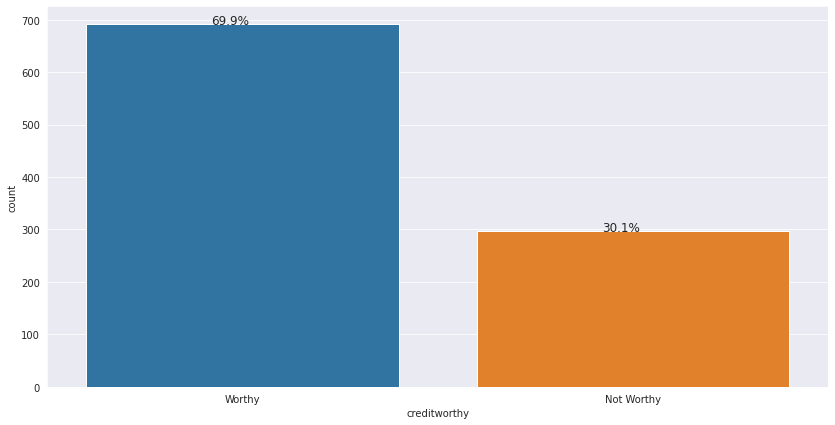

In [34]:
for i in cat_cols:
  print('\n\n', '!'*100, end='\n\n')
  if len(i)%2!=0 or len(i)%3!=0:
    make_plots(df[i], str(i).upper())
  else:
    sns.set_style("darkgrid")
    ax = sns.countplot(df[i])
    per_on_bar(ax, df[i])

Total unique values are:  4 


Category	Value

no checking account    390
< 0 Euro               272
< 200 Euro             265
>= 200 Euro             61
Name: status- minimum balance pm, dtype: int64


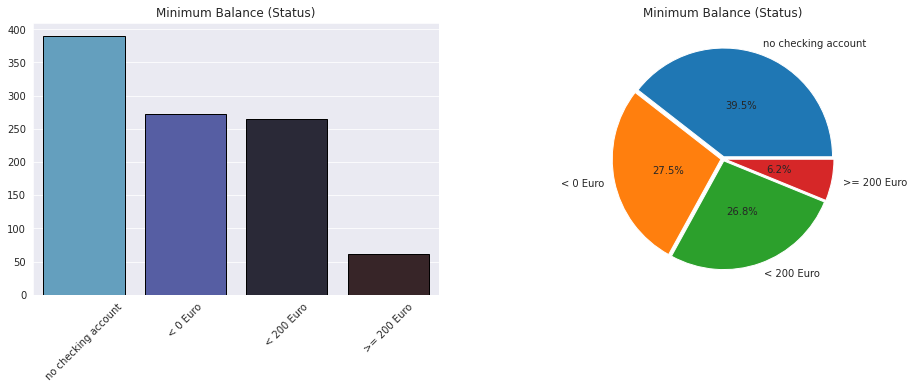

In [35]:
make_plots(df["status- minimum balance pm"], "Minimum Balance (Status)")

Total unique values are:  5 


Category	Value

existing credits paid back duly till now    525
critical account/                           288
delay in paying off in the past              86
all credits at this bank paid back duly      49
No credits taken                             40
Name: credithistory, dtype: int64


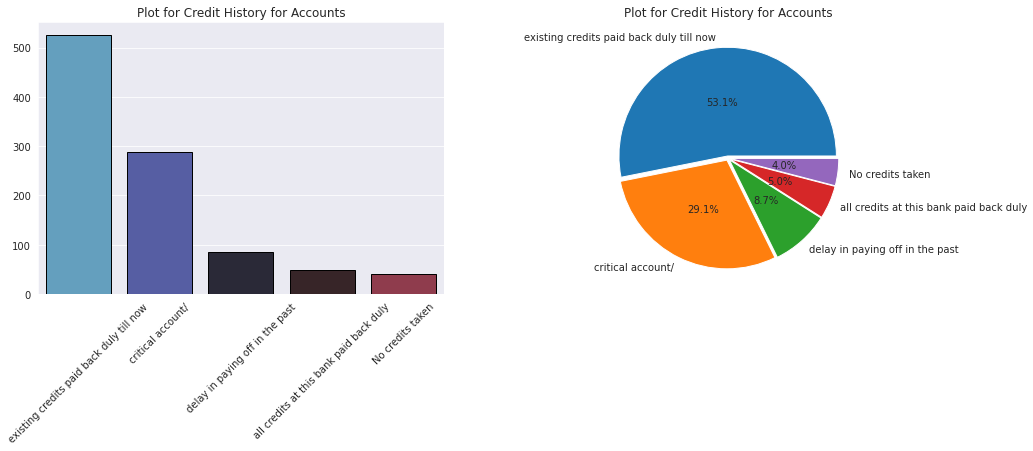

In [36]:
make_plots(df["credithistory"], "Plot for Credit History for Accounts")

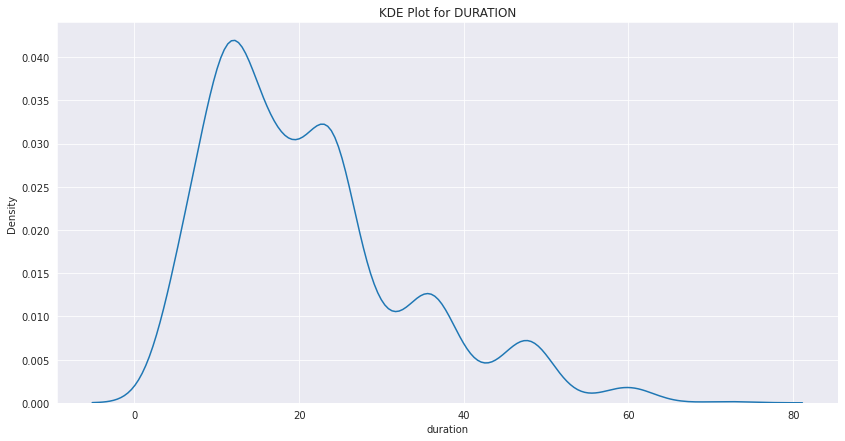

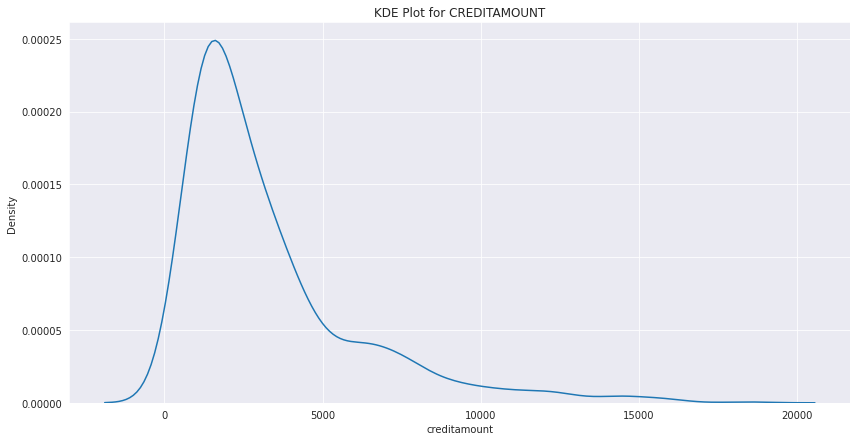

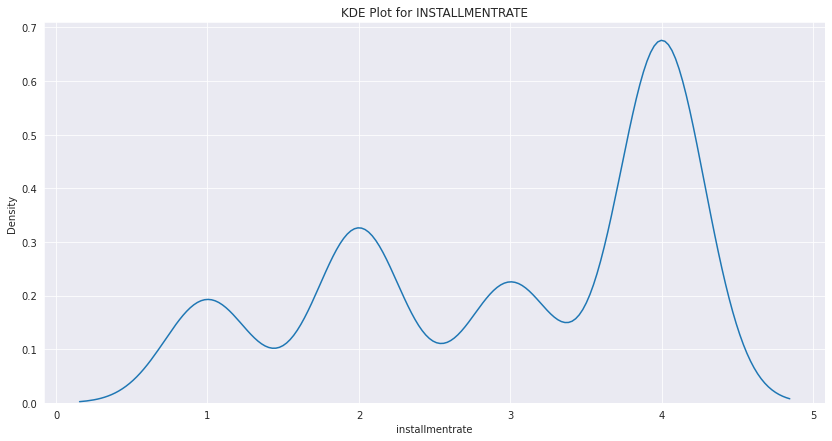

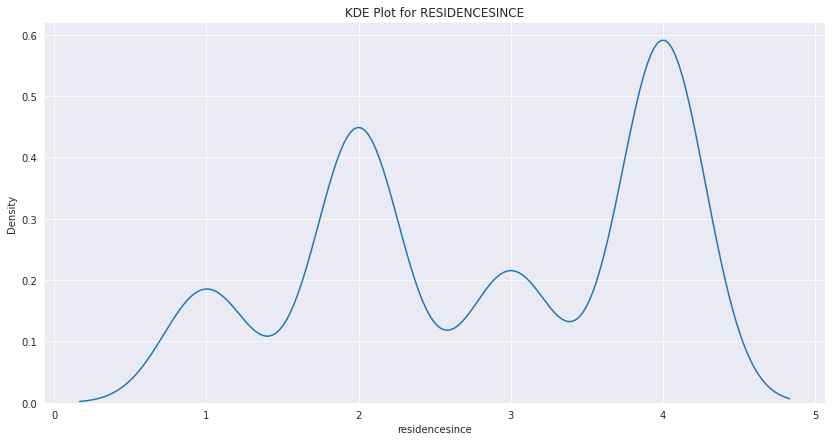

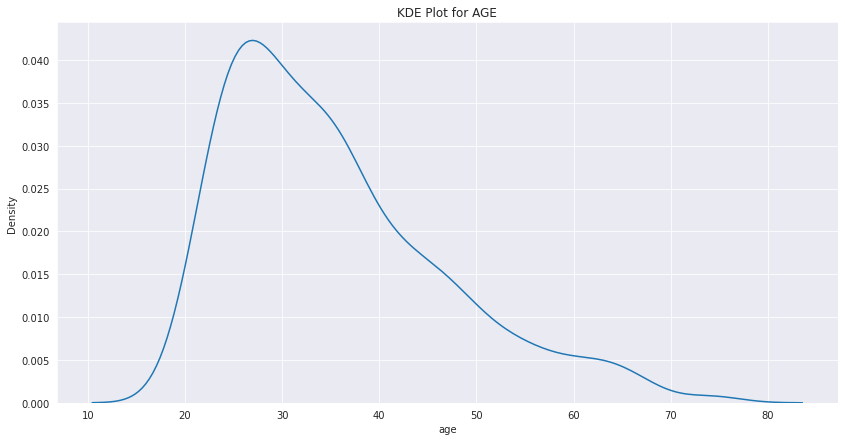

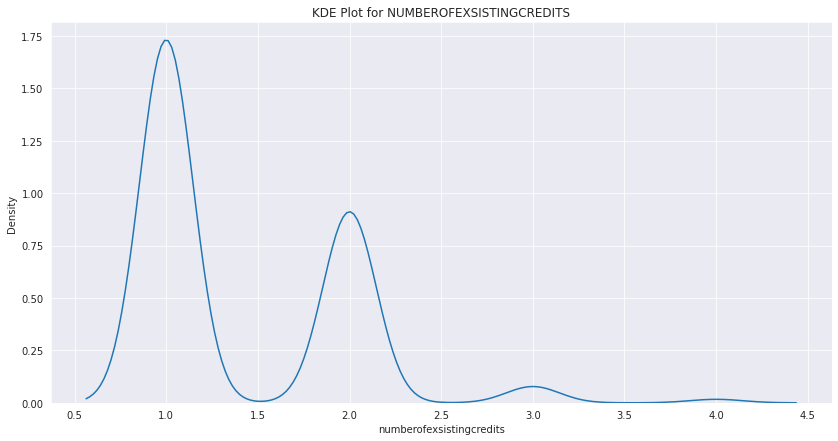

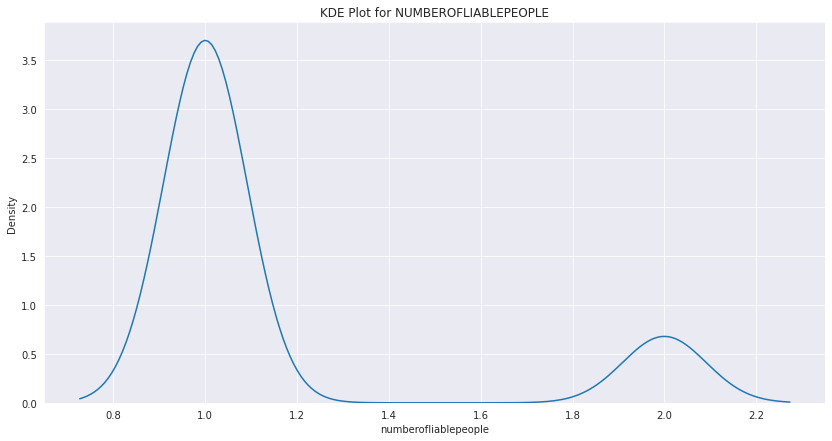

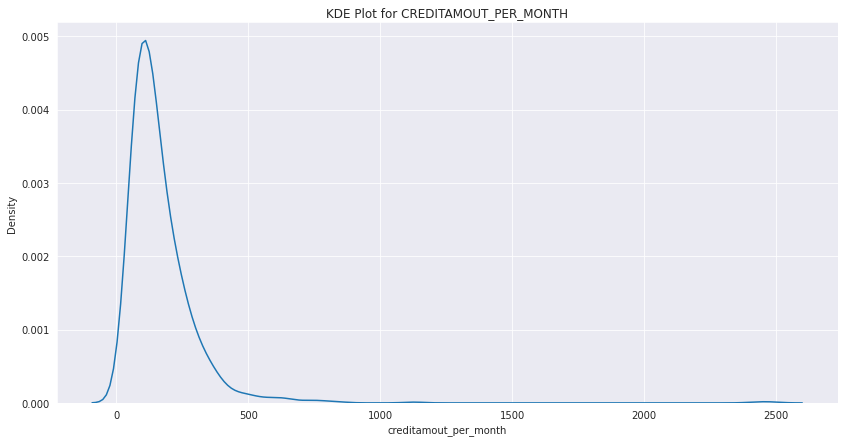

In [37]:
for i in num_cols:
  fig = px.line(x=df.index, y=df[i])
  fig.update_layout({
      'title': "LinePlot for "+str(i).upper()
  })
  fig.show()

  sns.kdeplot(df[i])
  plt.title(f'KDE Plot for {str(i).upper()}')
  plt.show()

### b) Multi-Variate Analysis

In [38]:
for i in cat_cols:
  fig = px.histogram(x=df[i], color=df.creditworthy, histnorm="percent")
  fig.update_layout({
      'title': f"{i} VS Credit Worth"
  })
  fig.show()

In [39]:
for i in num_cols:
  fig = px.line(x=df.index, y=df[i], color=df.creditworthy)
  fig.update_layout({
      'title': "LinePlot of "+str(i).upper()+" w.r.t Target "
  })
  fig.show()

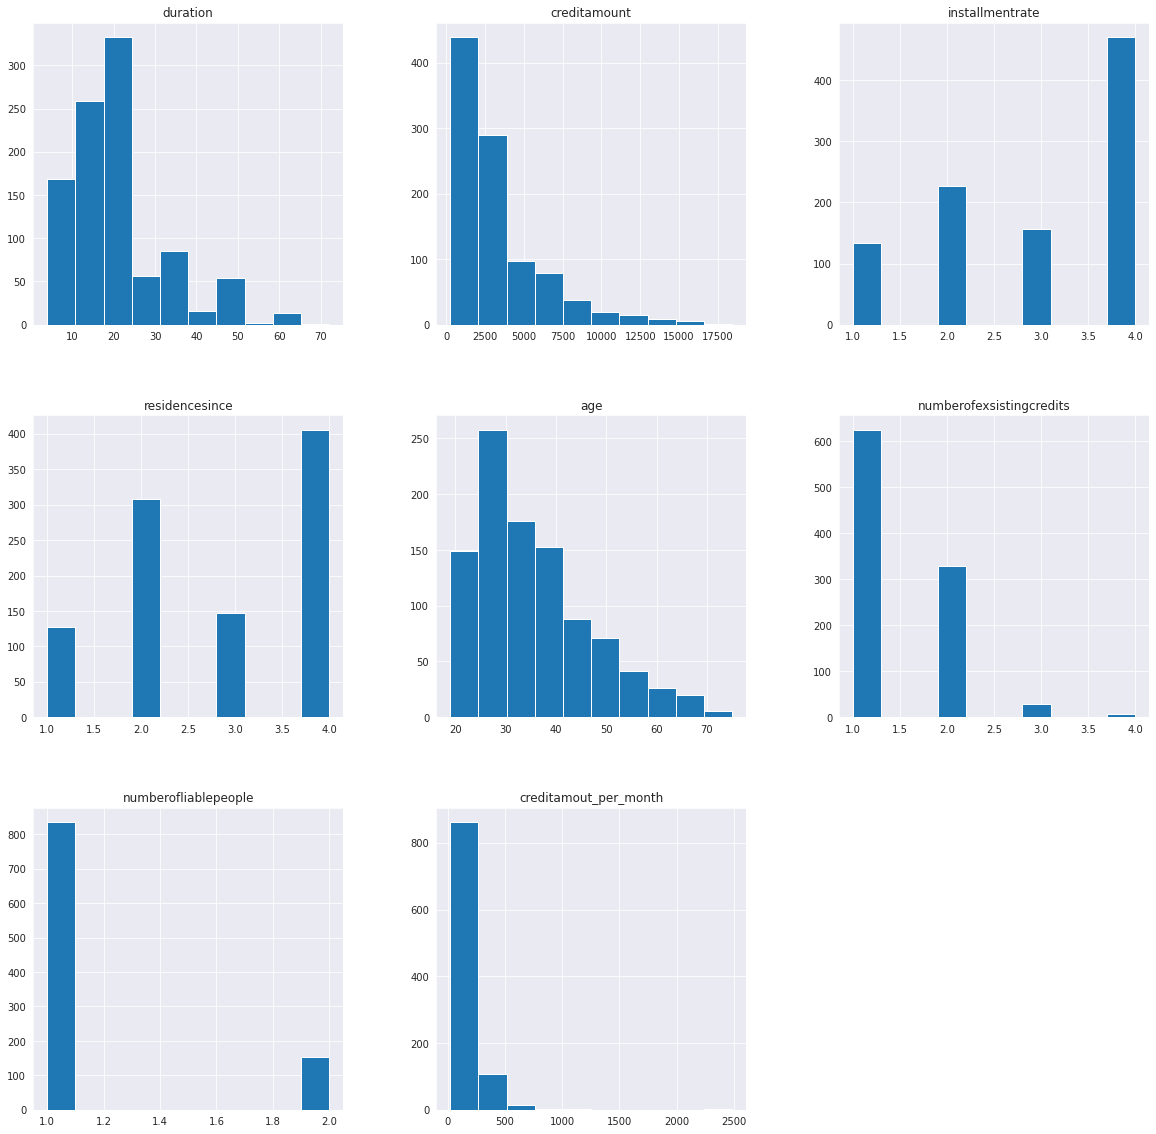

In [40]:
# Plot histograms of each parameter to get the distribution
df[num_cols].hist(figsize = (20, 20))
plt.show()

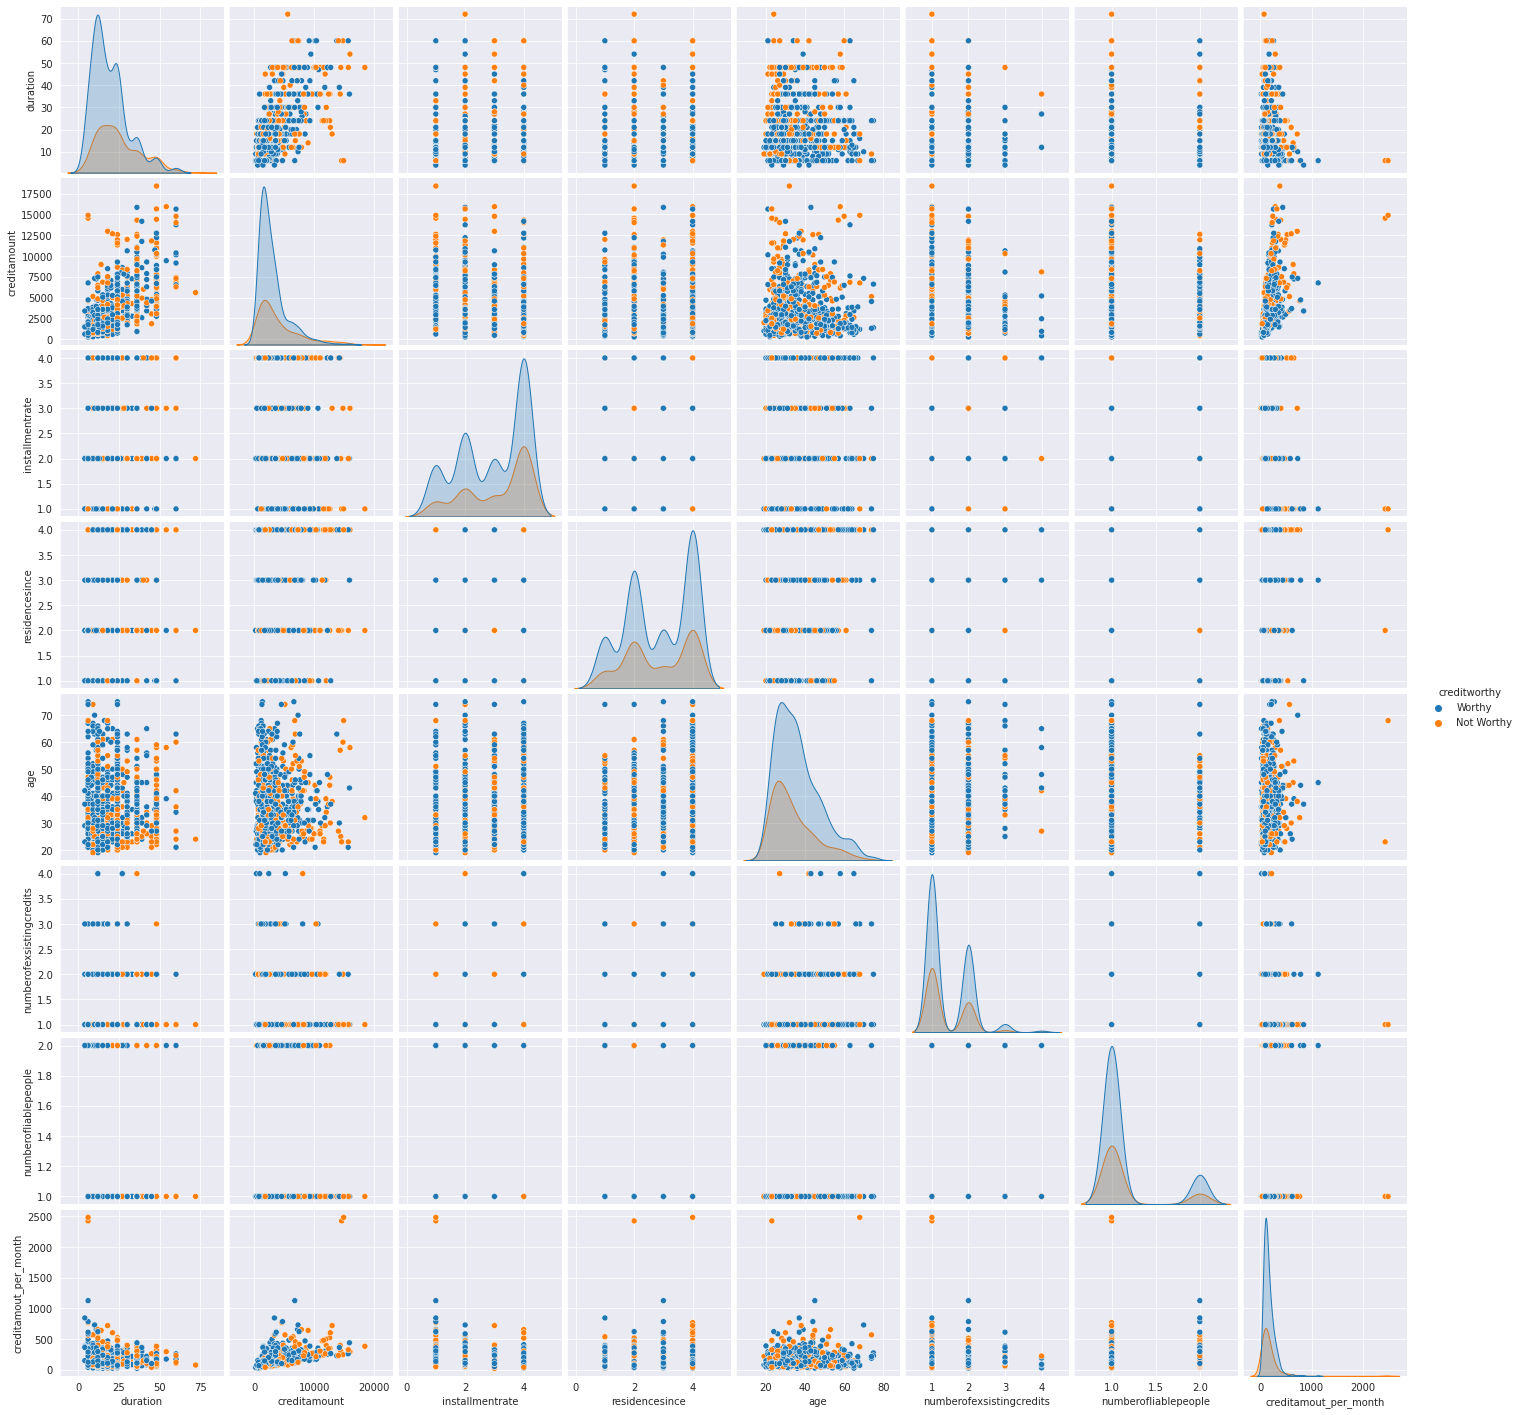

In [41]:
sns.pairplot(df, hue='creditworthy')
plt.show()

# Data Preparation

In [42]:
df.head()

,foreignworker,status- minimum balance pm,credithistory,purpose-credit sought [dominant last 6m],savings,employmentsince,otherdebtors,property,otherinstallments,housing,job,phone,duration,creditamount,installmentrate,residencesince,age,numberofexsistingcredits,numberofliablepeople,gender,creditworthy,creditamout_per_month
0,yes,< 0 Euro,critical account/,radio/television,unknown/ no savings account,.. >= 7 years,none,real estate,none,own,skilled employee / official,"yes, registered under the customers name",6,1169,4,4,67,2,1,male,Worthy,194.833333
1,yes,< 200 Euro,existing credits paid back duly till now,radio/television,... < 100 Euro,1 <= ... < 4 years,none,real estate,none,own,skilled employee / official,none,48,5951,2,2,22,1,1,female,Not Worthy,123.979167
2,yes,no checking account,critical account/,education,... < 100 Euro,4 <= ... < 7 years,none,real estate,none,own,unskilled - resident,none,12,2096,2,3,49,1,2,male,Worthy,174.666667
3,yes,< 0 Euro,existing credits paid back duly till now,furniture/equipment,... < 100 Euro,4 <= ... < 7 years,guarantor,building society savings agreement/ life insur...,none,for free,skilled employee / official,none,42,7882,2,4,45,1,2,male,Worthy,187.666667
4,yes,< 0 Euro,delay in paying off in the past,car (new),... < 100 Euro,1 <= ... < 4 years,none,unknown / no property,none,for free,skilled employee / official,none,24,4870,3,4,53,2,2,male,Not Worthy,202.916667


In [43]:
# Checking for Duplicate Values
df[df.duplicated()]

,foreignworker,status- minimum balance pm,credithistory,purpose-credit sought [dominant last 6m],savings,employmentsince,otherdebtors,property,otherinstallments,housing,job,phone,duration,creditamount,installmentrate,residencesince,age,numberofexsistingcredits,numberofliablepeople,gender,creditworthy,creditamout_per_month


In [44]:
# Checking Null values
df.isnull().sum()

foreignworker                               0
status- minimum balance pm                  0
credithistory                               0
purpose-credit sought [dominant last 6m]    0
savings                                     0
employmentsince                             0
otherdebtors                                0
property                                    0
otherinstallments                           0
housing                                     0
job                                         0
phone                                       0
duration                                    0
creditamount                                0
installmentrate                             0
residencesince                              0
age                                         0
numberofexsistingcredits                    0
numberofliablepeople                        0
gender                                      0
creditworthy                                0
creditamout_per_month             

# Feature Engineering

In [45]:
# Encoding categorical features
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

for i in cat_cols:
  df[i] = encoder.fit_transform(df[i])

df.head()

,foreignworker,status- minimum balance pm,credithistory,purpose-credit sought [dominant last 6m],savings,employmentsince,otherdebtors,property,otherinstallments,housing,job,phone,duration,creditamount,installmentrate,residencesince,age,numberofexsistingcredits,numberofliablepeople,gender,creditworthy,creditamout_per_month
0,2,0,2,7,4,0,2,2,1,1,1,1,6,1169,4,4,67,2,1,1,1,194.833333
1,2,1,4,7,1,2,2,2,1,1,1,0,48,5951,2,2,22,1,1,0,0,123.979167
2,2,3,2,4,1,3,2,2,1,1,3,0,12,2096,2,3,49,1,2,1,1,174.666667
3,2,0,4,5,1,3,1,0,1,0,1,0,42,7882,2,4,45,1,2,1,1,187.666667
4,2,0,3,1,1,2,2,3,1,0,1,0,24,4870,3,4,53,2,2,1,0,202.916667


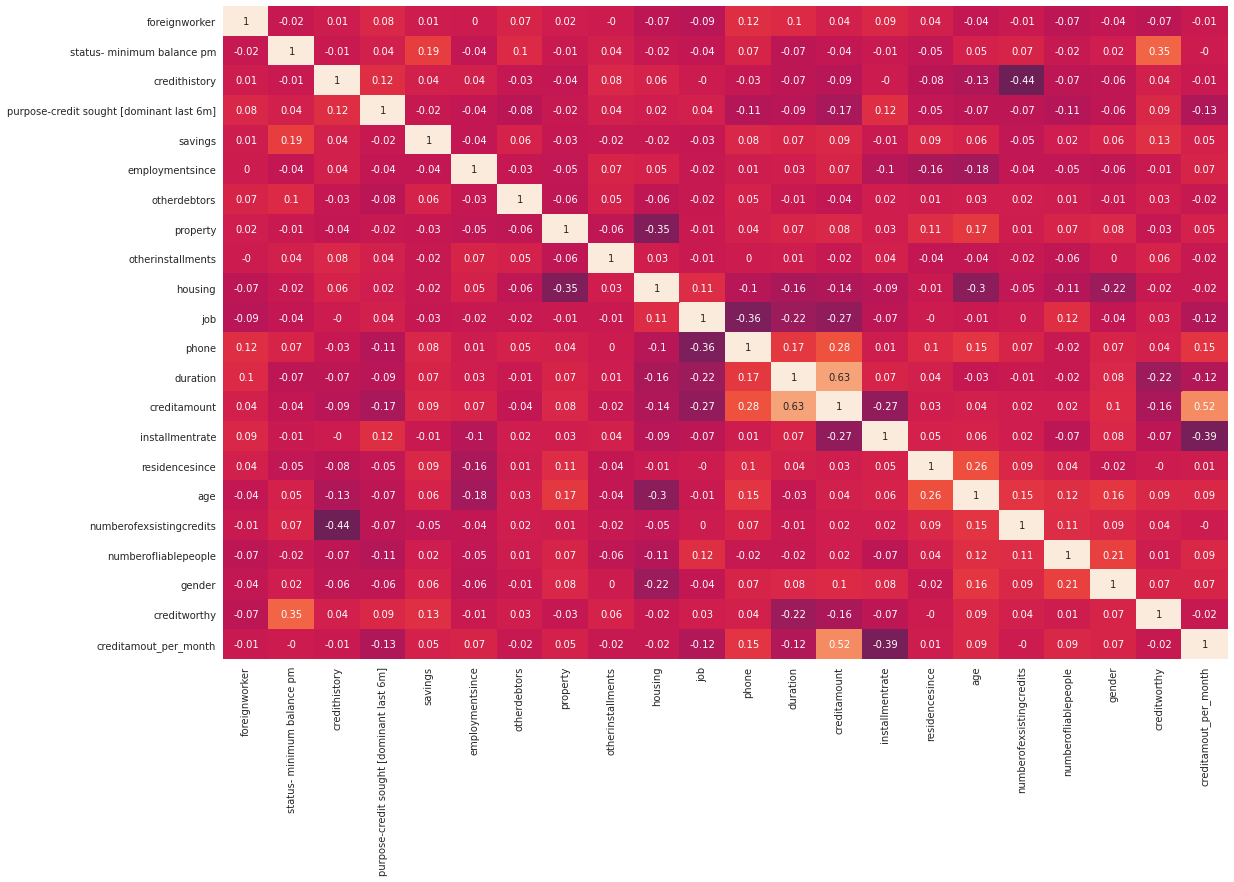

In [46]:
# Finding Correlation of features 
plt.figure(figsize=(18, 12))
sns.heatmap(round(df.corr(), 2), annot=True, vmin=-1, vmax=1, cbar=False)
plt.show()

In [47]:
# Splitting data into dependent and independent
X = df.drop('creditworthy', axis=1)
y = df.creditworthy

In [48]:
# Splitting data into train, test part
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [49]:
# Scalling Input data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

# Building Model

### Initial Models

In [50]:
# Importing Models
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, cross_val_score

# Importing performance measurement functions
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.metrics import plot_confusion_matrix, confusion_matrix, classification_report, plot_roc_curve

In [51]:
# Arrays to store models Performance
acc = []
pre = []
rec = []
f1 = []
con = []
cross = []

+ ==================================================================================================== +
			1-For Support Vector Classifier The Performance result is: 
+ ==================================================================================================== +
Accuracy :  0.7727272727272727
--------------------------------------------------
F1 :  0.6884070641720581
--------------------------------------------------
Reacll :  0.6731989548338932
--------------------------------------------------
Precision :  0.7289473684210527
--------------------------------------------------
cross validation accuracy :  0.7095062298107984
--------------------------------------------------
Confusion Matrix....
 [[ 25  32]
 [ 13 128]]
--------------------------------------------------
Classification Report....
               precision    recall  f1-score   support

           0       0.66      0.44      0.53        57
           1       0.80      0.91      0.85       141

    accuracy        

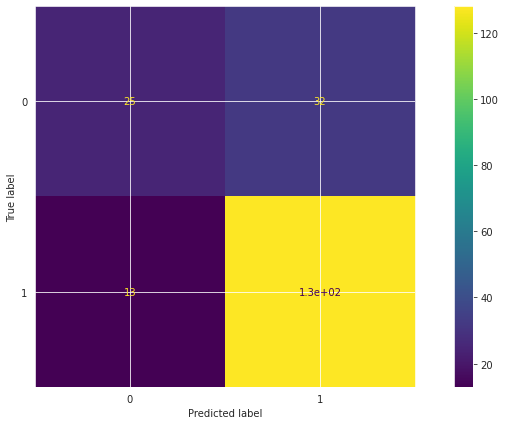

							-----------------------------------------------------------
							 Time for detection (Support Vector Classifier) : 1.602 seconds...
							-----------------------------------------------------------

+ ==================================================================================================== +
			2-For Naive Bayes Classifier The Performance result is: 
+ ==================================================================================================== +
Accuracy :  0.7070707070707071
--------------------------------------------------
F1 :  0.6499207413730033
--------------------------------------------------
Reacll :  0.6532288167226576
--------------------------------------------------
Precision :  0.6473614933588608
--------------------------------------------------
cross validation accuracy :  0.7206378505870891
--------------------------------------------------
Confusion Matrix....
 [[ 30  27]
 [ 31 110]]
--------------------------------------------------
Class

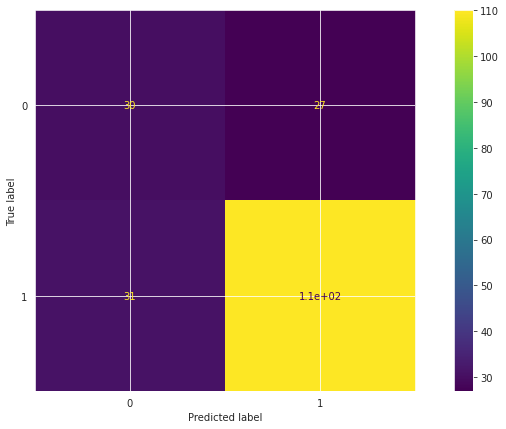

							-----------------------------------------------------------
							 Time for detection (Naive Bayes Classifier) : 0.267 seconds...
							-----------------------------------------------------------

+ ==================================================================================================== +
			3-For LogisitcRegression The Performance result is: 
+ ==================================================================================================== +
Accuracy :  0.7272727272727273
--------------------------------------------------
F1 :  0.6233619839368748
--------------------------------------------------
Reacll :  0.6151549085479657
--------------------------------------------------
Precision :  0.6553634379721336
--------------------------------------------------
cross validation accuracy :  0.7408398707891093
--------------------------------------------------
Confusion Matrix....
 [[ 20  37]
 [ 17 124]]
--------------------------------------------------
Classificati

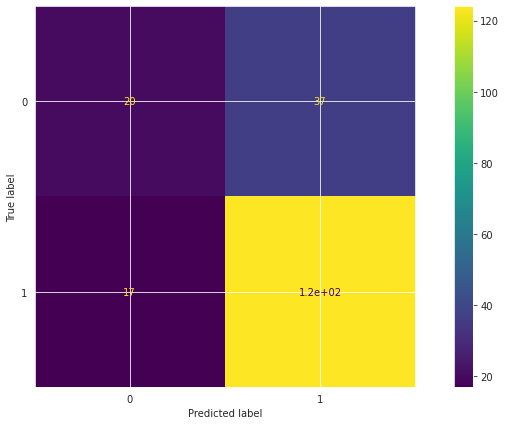

							-----------------------------------------------------------
							 Time for detection (LogisitcRegression) : 0.417 seconds...
							-----------------------------------------------------------

+ ==================================================================================================== +
			4-For KNeighborsClassifier The Performance result is: 
+ ==================================================================================================== +
Accuracy :  0.7373737373737373
--------------------------------------------------
F1 :  0.6474455554033695
--------------------------------------------------
Reacll :  0.6379245987308697
--------------------------------------------------
Precision :  0.6722075501009788
--------------------------------------------------
cross validation accuracy :  0.6579192944675178
--------------------------------------------------
Confusion Matrix....
 [[ 23  34]
 [ 18 123]]
--------------------------------------------------
Classification

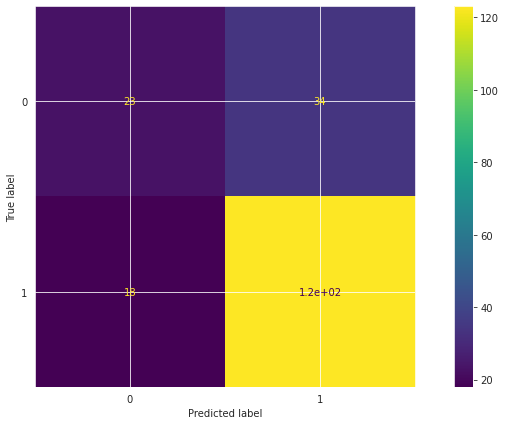

							-----------------------------------------------------------
							 Time for detection (KNeighborsClassifier) : 0.325 seconds...
							-----------------------------------------------------------

+ ==================================================================================================== +
			5-For DecisionTreeClassifier The Performance result is: 
+ ==================================================================================================== +
Accuracy :  0.7323232323232324
--------------------------------------------------
F1 :  0.664546239171435
--------------------------------------------------
Reacll :  0.6605076521089959
--------------------------------------------------
Precision :  0.6699157007376185
--------------------------------------------------
cross validation accuracy :  0.6832333487155822
--------------------------------------------------
Confusion Matrix....
 [[ 28  29]
 [ 24 117]]
--------------------------------------------------
Classificat

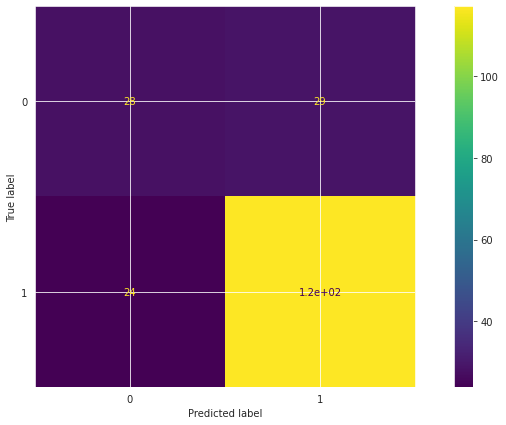

							-----------------------------------------------------------
							 Time for detection (DecisionTreeClassifier) : 0.272 seconds...
							-----------------------------------------------------------



In [52]:
# check the performance on diffrent regressor
models = []
models.append(('Support Vector Classifier', SVC()))
models.append(('Naive Bayes Classifier', GaussianNB()))
models.append(('LogisitcRegression', LogisticRegression()))
models.append(('KNeighborsClassifier', KNeighborsClassifier()))
models.append(('DecisionTreeClassifier', DecisionTreeClassifier()))


# prepare the cross-validation procedure
cv = KFold(n_splits=5, random_state=1, shuffle=True)

import time
i = 0
for name,model in models:
    i = i+1
    start_time = time.time()
    
    # Fitting model to the Training set
    clf = model
    clf.fit(X_train, y_train)
    
    # predict values
    y_pred = clf.predict(X_test)
    
    # Accuracy
    accuracy = accuracy_score(y_test, y_pred)
    acc.append(accuracy)
    # Precision
    precision = np.mean(precision_score(y_test, y_pred, average=None))
    pre.append(precision)
    # Recall
    recall = np.mean(recall_score(y_test, y_pred, average=None))
    rec.append(recall)
    # F1 Score
    f1_sco = np.mean(f1_score(y_test, y_pred, average=None))
    f1.append(f1_sco)
    # evaluate model
    scores = np.mean(cross_val_score(clf, X, y, cv=cv, n_jobs=-1))
    cross.append(scores)
    # Confusion Matrix
    confusion_mat = confusion_matrix(y_test, y_pred)
    con.append(confusion_mat)
    # Report
    report = classification_report(y_test, y_pred)
    


    print("+","="*100,"+")
    print('\033[1m' + f"\t\t\t{i}-For {name} The Performance result is: " + '\033[0m')
    print("+","="*100,"+")
    print('Accuracy : ', accuracy)   
    print("-"*50)
    print('F1 : ', f1_sco)
    print("-"*50)
    print('Reacll : ', recall)
    print("-"*50)
    print('Precision : ', precision)
    print("-"*50)
    print('cross validation accuracy : ', np.mean(scores))
    print("-"*50)
    print('Confusion Matrix....\n', confusion_mat)
    print("-"*50)
    print('Classification Report....\n', report)
    print("-"*50)
    print('Plotting Confusion Matrix...\n')
    plot_confusion_matrix(clf, X_test, y_test)
    plt.show()


    
    print("\t\t\t\t\t\t\t-----------------------------------------------------------")
    print(f"\t\t\t\t\t\t\t Time for detection ({name}) : {round((time.time() - start_time), 3)} seconds...")
    print("\t\t\t\t\t\t\t-----------------------------------------------------------")
    print()

# Models Comparison

In [53]:
# Extracting Model's names
names = []
for i in models:
  names.append(i[0])

In [54]:
comp = pd.DataFrame({"Model": names, "Accuracy": acc, "Precision": pre, "Recall": rec, "F1 Score": f1, "Cross Va Score": cross, "Confusion Matric": con})
comp

,Model,Accuracy,Precision,Recall,F1 Score,Cross Va Score,Confusion Matric
0,Support Vector Classifier,0.772727,0.728947,0.673199,0.688407,0.709506,"[[25, 32], [13, 128]]"
1,Naive Bayes Classifier,0.707071,0.647361,0.653229,0.649921,0.720638,"[[30, 27], [31, 110]]"
2,LogisitcRegression,0.727273,0.655363,0.615155,0.623362,0.740840,"[[20, 37], [17, 124]]"
3,KNeighborsClassifier,0.737374,0.672208,0.637925,0.647446,0.657919,"[[23, 34], [18, 123]]"
4,DecisionTreeClassifier,0.732323,0.669916,0.660508,0.664546,0.683233,"[[28, 29], [24, 117]]"


By observing the scores of all models we can say that Support Vector is performing much better than any other model.

# Building Final Model

In [55]:
# Fitting Final Model
model = SVC()
model.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [56]:
# Making Predictions
y_pre = model.predict(X_test)

pd.DataFrame({"Original": y_test, "Predicted": y_pred}).head(20)

,Original,Predicted
213,1,1
331,1,0
500,1,1
309,0,0
88,0,1
534,0,1
280,1,0
107,1,0
59,0,1
578,1,1


In [57]:
print("Accuracy Score is", accuracy_score(y_test, y_pred), end="\n\n")
print("Classification Report.......\n\n", classification_report(y_test, y_pred))

Accuracy Score is 0.7323232323232324

Classification Report.......

               precision    recall  f1-score   support

           0       0.54      0.49      0.51        57
           1       0.80      0.83      0.82       141

    accuracy                           0.73       198
   macro avg       0.67      0.66      0.66       198
weighted avg       0.73      0.73      0.73       198



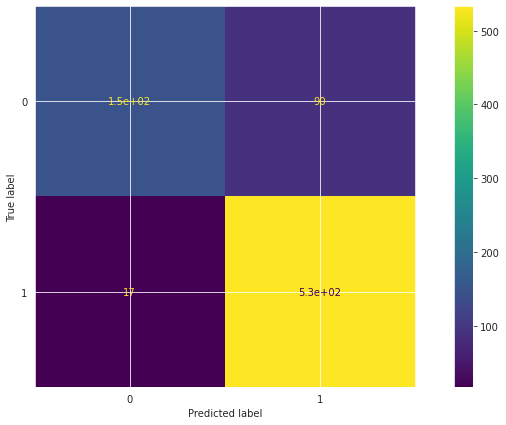

In [58]:
# Plotting Confusion Matrix
plot_confusion_matrix(model, X_train, y_train)
plt.show()

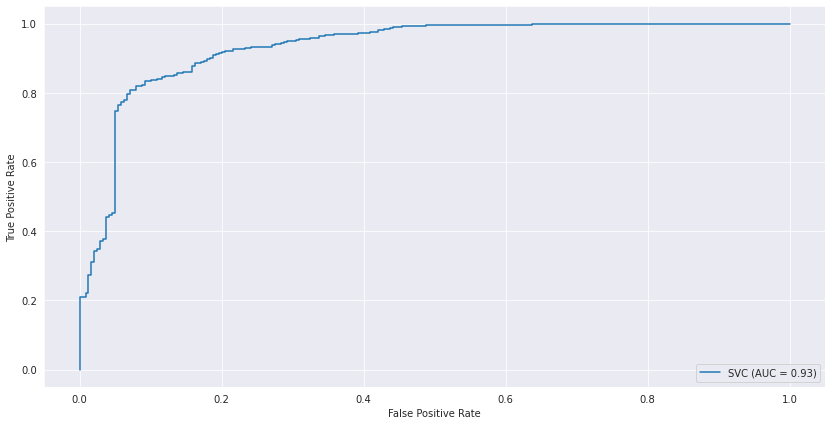

In [59]:
# PLotting ROC/AUC curve
plot_roc_curve(model, X_train, y_train)
plt.show()